<a href="https://colab.research.google.com/github/As2909/PRODIGY_ML_02/blob/main/Task_02_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Prepocessing the dataset**

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum().sort_values(ascending=False)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


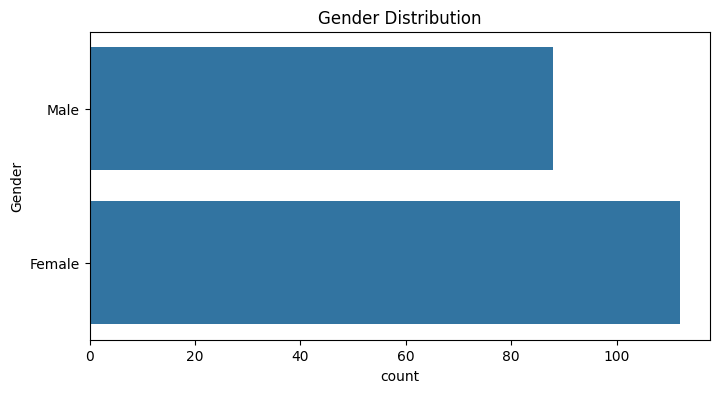

In [48]:
plt.figure(figsize=(8, 4))
sns.countplot(y="Gender", data=df)
plt.title(label="Gender Distribution")
plt.show()

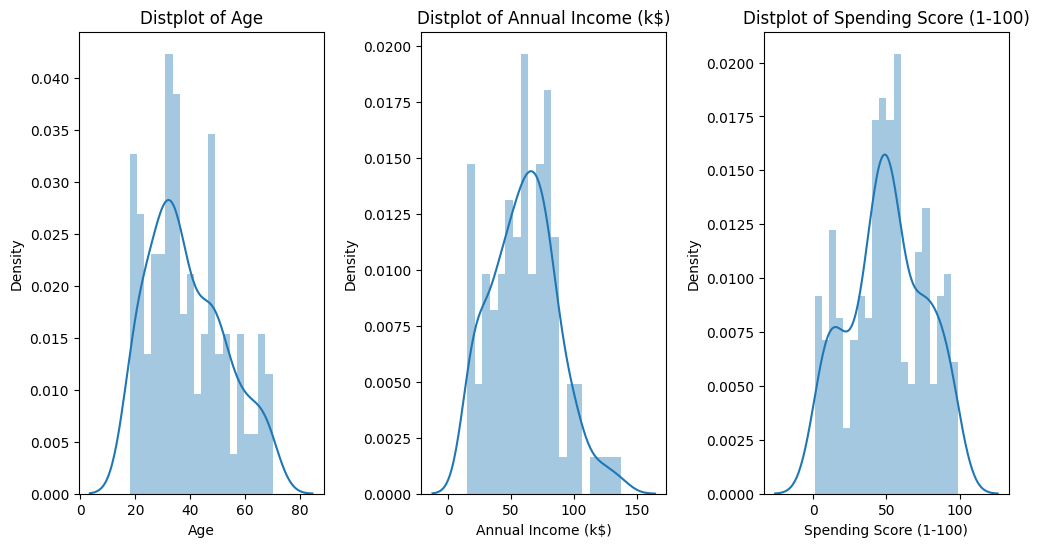

In [46]:
plt.figure(1 , figsize = (12, 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.2 , wspace = 0.4)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [10]:
# Select the relevant features for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Standardized the features

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
# Determine the optimal number of clusters using Elbow method

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=10)
  kmeans.fit(X_scaled)
  wcss.append(round(kmeans.inertia_, 2))

print(wcss)

[400.0, 269.3, 157.7, 108.92, 65.57, 55.11, 46.78, 37.32, 32.42, 29.06]


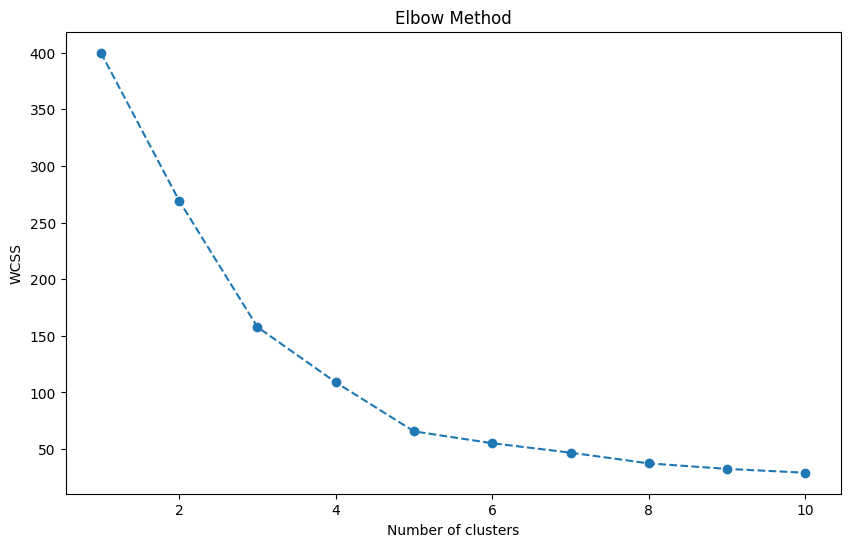

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel(ylabel="WCSS")
plt.show()

In [31]:
# Apply kmeans with optimal number of cluster let k=5
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=10)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

In [37]:
df["Clusters"] = clusters
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


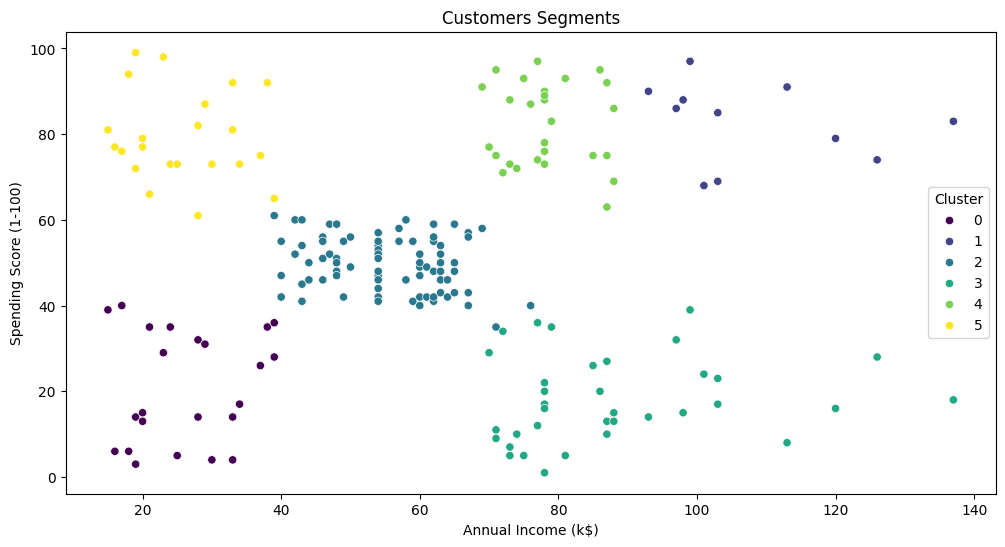

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="clusters_labels", palette="viridis")
plt.title("Customers Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()